<a href="https://colab.research.google.com/github/AKACristianC/GitHub/blob/main/Cristian_experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing TensorFlow for building and training the neural network
import tensorflow as tf

# Importing Seaborn for data visualization
import seaborn as sns

# Importing NumPy for numerical operations
import numpy as np

# Importing Image from PIL to handle image processing
from PIL import Image

# Importing glob to handle file path pattern matching
import glob

# Importing defaultdict from collections to count occurrences of image shapes
from collections import defaultdict

# Importing Keras and layers from TensorFlow for building the neural network model
from tensorflow import keras
from tensorflow.keras import layers

# Upload the data ussing and API from kaggle

For this part of the assessment I used a github toutorial from: https://github.com/bnsreenu/python_for_microscopists/blob/master/Tips_tricks_35_loading_kaggle_data_to_colab.ipynb

In [ ]:
#Mount the Google drive so you can store your kaggle API credentials for future use
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Make a directory for kaggle at the temporary instance location on Colab drive.
! mkdir ~/.kaggle

In [ ]:
#Upload the json file to Google Drive and then copy to the temporary location.
!cp /content/drive/MyDrive/Kaggle/kaggle.json ~/.kaggle/kaggle.json


In [ ]:
#Change the file permissions to read/write to the owner only
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#load the data from Kaggle
! kaggle competitions download -c dogs-vs-cats

100% 812M/812M [00:12<00:00, 168MB/s]
100% 812M/812M [00:12<00:00, 67.3MB/s]


In [ ]:
#unzip the files
! unzip dogs-vs-cats.zip

Archive:  dogs-vs-cats.zip
  inflating: sampleSubmission.csv    
  inflating: test1.zip               
  inflating: train.zip               


In [ ]:
#unzip the rest of the files
! unzip train.zip
! unzip test1.zip

Streaming output truncated to the last 5000 lines.
  inflating: test1/5499.jpg          
  inflating: test1/55.jpg            
  inflating: test1/550.jpg           
  inflating: test1/5500.jpg          
  inflating: test1/5501.jpg          
  inflating: test1/5502.jpg          
  inflating: test1/5503.jpg          
  inflating: test1/5504.jpg          
  inflating: test1/5505.jpg          
  inflating: test1/5506.jpg          
  inflating: test1/5507.jpg          
  inflating: test1/5508.jpg          
  inflating: test1/5509.jpg          
  inflating: test1/551.jpg           
  inflating: test1/5510.jpg          
  inflating: test1/5511.jpg          
  inflating: test1/5512.jpg          
  inflating: test1/5513.jpg          
  inflating: test1/5514.jpg          
  inflating: test1/5515.jpg          
  inflating: test1/5516.jpg          
  inflating: test1/5517.jpg          
  inflating: test1/5518.jpg          
  inflating: test1/5519.jpg          
  inflating: test1/552.jpg           

In [ ]:
# Check versions of the libraries are installed
print(f"TensorFlow version: {tf.__version__}")
print(f"Seaborn version: {sns.__version__}")
print(f"NumPy version: {np.__version__}")

TensorFlow version: 2.15.0
Seaborn version: 0.13.1
NumPy version: 1.25.2


In [ ]:
# Define the target size for the images (width, height)
IMG_SIZE = (94, 125)

# Function to read an image from a file path, resize it, and convert it to a NumPy array
def pixels_from_path(file_path):
    # Open the image file
    im = Image.open(file_path)

    # Resize the image to the target size
    im = im.resize(IMG_SIZE)

    # Convert the image to a NumPy array
    np_im = np.array(im)

    # Return the NumPy array of the image
    return np_im

In [ ]:
glob.glob('/content/train/cat*') #/content/train

['/content/train/cat.1953.jpg',
 '/content/train/cat.8093.jpg',
 '/content/train/cat.4780.jpg',
 '/content/train/cat.8488.jpg',
 '/content/train/cat.4494.jpg',
 '/content/train/cat.1059.jpg',
 '/content/train/cat.6205.jpg',
 '/content/train/cat.10037.jpg',
 '/content/train/cat.1739.jpg',
 '/content/train/cat.10607.jpg',
 '/content/train/cat.6736.jpg',
 '/content/train/cat.11688.jpg',
 '/content/train/cat.2977.jpg',
 '/content/train/cat.4862.jpg',
 '/content/train/cat.600.jpg',
 '/content/train/cat.89.jpg',
 '/content/train/cat.10271.jpg',
 '/content/train/cat.2813.jpg',
 '/content/train/cat.11.jpg',
 '/content/train/cat.6781.jpg',
 '/content/train/cat.8971.jpg',
 '/content/train/cat.11643.jpg',
 '/content/train/cat.9362.jpg',
 '/content/train/cat.8666.jpg',
 '/content/train/cat.11269.jpg',
 '/content/train/cat.4776.jpg',
 '/content/train/cat.4336.jpg',
 '/content/train/cat.8544.jpg',
 '/content/train/cat.1398.jpg',
 '/content/train/cat.8178.jpg',
 '/content/train/cat.1745.jpg',
 '/cont

In [ ]:
# Count occurrences of each image shape
shape_counts = defaultdict(int)
# Iterate through the first 1000 images (or fewer if there aren't 1000)
for i, cat in enumerate(glob.glob('/content/train/cat*')[:1000]):
    if i%100==0:
        print(i)
    img_shape = pixels_from_path(cat).shape
    shape_counts[str(img_shape)]= shape_counts[str(img_shape)]+ 1

0
100
200
300
400
500
600
700
800
900


In [ ]:
# Convert shape counts to a sorted list of tuples
shape_items = list(shape_counts.items())

# Sort the list of tuples by the count (second item in each tuple)
shape_items.sort(key=lambda x: x[1])

# Reverse the list to have the most common shapes first
shape_items.reverse()

In [ ]:
# 10% of the data will automatically be used for validation
validation_size = 0.1
img_size = IMG_SIZE # resize images to be 374x500 (most common shape)
num_channels = 3 # RGB
sample_size = 8192 #We'll use 8192 pictures (2**13)

In [ ]:
# Get the total number of cat image files in the specified directory
len(glob.glob('/content/train/cat*'))

12500

In [ ]:
## Check the shape of the 6th image in the list of cat image file paths
pixels_from_path(glob.glob('/content/train/cat*')[5]).shape

(125, 94, 3)

In [ ]:
# Define the sample size for training images
SAMPLE_SIZE = 2048
# Load and process training cat images
print("loading training cat images...")
cat_train_set = np.asarray([pixels_from_path(cat) for cat in glob.glob('/content/train/cat*')[:SAMPLE_SIZE]])
# Load and process training dog images
print("loading training dog images...")
dog_train_set = np.asarray([pixels_from_path(dog) for dog in glob.glob('/content/train/dog*')[:SAMPLE_SIZE]])

loading training cat images...
loading training dog images...


In [ ]:
valid_size = 512
#starst validation for cat images
print("loading validation cat images...")
#starts validation for dog images
cat_valid_set = np.asarray([pixels_from_path(cat) for cat in glob.glob('/content/train/cat*')[-valid_size:]])
print("loading validation dog images...")
dog_valid_set = np.asarray([pixels_from_path(dog) for dog in glob.glob('/content/train/dog*')[-valid_size:]])

loading validation cat images...
loading validation dog images...


In [ ]:
# Concatenate the cat and dog training datasets into a single array
x_train = np.concatenate([cat_train_set, dog_train_set])
#create labels for trainign
labels_train = np.asarray([1 for _ in range(SAMPLE_SIZE)]+[0 for _ in range(SAMPLE_SIZE)])

In [ ]:
# Concatenate the cat and dog validation datasets into a single array
x_valid = np.concatenate([cat_valid_set, dog_valid_set])
# Create the labels for validation dataset
labels_valid = np.asarray([1 for _ in range(valid_size)]+[0 for _ in range(valid_size)])

In [ ]:
x_train.shape

(4096, 125, 94, 3)

In [ ]:
labels_train.shape

(4096,)

# Run of the Mill MLP

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
# Calculate the total number of pixels in the resized images

total_pixels = img_size[0] *img_size[1] * 3
fc_size = 512

inputs = keras.Input(shape=(img_size[1], img_size[0],3), name='ani_image')
x = layers.Flatten(name = 'flattened_img')(inputs) #turn image to vector.

x = layers.Dense(fc_size, activation='relu', name='first_layer')(x)
outputs = layers.Dense(1, activation='sigmoid', name='class')(x)
# Create the model by specifying the inputs and outputs
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
customAdam = keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=customAdam,  # Optimizer
              # Loss function to minimize
              loss="mean_squared_error",
              # List of metrics to monitor
              metrics=["binary_crossentropy","mean_squared_error"])

In [ ]:
print('# Fit model on training data')

history = model.fit(x_train,         #Training data
                    labels_train,    #Training labels
                    batch_size=32,   #Numbers of samples per gradient update
                    shuffle = True, #important since we loaded cats first, dogs second.
                    epochs=10,       #Number of epochs to train the model.
                    # We pass it validation data to
                    # monitor loss and metrics
                    # at the end of each epoch
                    validation_data=(x_valid, labels_valid)) #validation data and labels

# Fit model on training data
Epoch 1/10
128/128 [==============================] - 78s 594ms/step - loss: 0.4998 - binary_crossentropy: 91993.8906 - mean_squared_error: 0.4998 - val_loss: 0.5000 - val_binary_crossentropy: 99030.4688 - val_mean_squared_error: 0.5000
Epoch 2/10
128/128 [==============================] - 70s 549ms/step - loss: 0.5000 - binary_crossentropy: 99167.4297 - mean_squared_error: 0.5000 - val_loss: 0.5000 - val_binary_crossentropy: 99030.7188 - val_mean_squared_error: 0.5000
Epoch 3/10
128/128 [==============================] - 73s 575ms/step - loss: 0.5000 - binary_crossentropy: 99167.4609 - mean_squared_error: 0.5000 - val_loss: 0.5000 - val_binary_crossentropy: 99030.7188 - val_mean_squared_error: 0.5000
Epoch 4/10
128/128 [==============================] - 71s 558ms/step - loss: 0.5000 - binary_crossentropy: 99167.4141 - mean_squared_error: 0.5000 - val_loss: 0.5000 - val_binary_crossentropy: 99030.7188 - val_mean_squared_error: 0.5000
Epoch 5/10
128/128 [===

# Single Convolutional Layer

In [ ]:
# Define the size of the fully connected layers in the CNN
fc_layer_size = 128

# Define the input size of the images
img_size = IMG_SIZE

# Define the input layer with the shape of the resized images
conv_inputs = keras.Input(shape=(img_size[1], img_size[0], 3), name='ani_image')

# Add a convolutional layer with 24 filters, a kernel size of 3x3, and ReLU activation
conv_layer = layers.Conv2D(24, kernel_size=3, activation='relu')(conv_inputs)

# Add a max pooling layer with a pool size of 2x2
conv_layer = layers.MaxPool2D(pool_size=(2, 2))(conv_layer)

# Flatten the feature maps to convert them into a vector
conv_x = layers.Flatten(name='flattened_features')(conv_layer)

# Add a fully connected (dense) layer with ReLU activation
conv_x = layers.Dense(fc_layer_size, activation='relu', name='first_layer')(conv_x)

# Add another fully connected (dense) layer with ReLU activation
conv_x = layers.Dense(fc_layer_size, activation='relu', name='second_layer')(conv_x)

# Add the output layer with a single neuron and sigmoid activation for binary classification
conv_outputs = layers.Dense(1, activation='sigmoid', name='class')(conv_x)

# Create the convolutional model by specifying the inputs and outputs
conv_model = keras.Model(inputs=conv_inputs, outputs=conv_outputs)

In [ ]:
customAdam = keras.optimizers.Adam(lr=1e-6)
conv_model.compile(optimizer=customAdam,  # Optimizer
              # Loss function to minimize
              loss="binary_crossentropy",
              # List of metrics to monitor
              metrics=["binary_crossentropy","mean_squared_error"])

In [ ]:
print('# Fit model on training data')

history = conv_model.fit(x_train,
                    labels_train, #we pass it th labels
                    #If the model is taking forever to train, make this bigger
                    #If it is taking forever to load for the first epoch, make this smaller
                    batch_size=32,
                    shuffle = True,
                    epochs=5,
                    # We pass it validation data to
                    # monitor loss and metrics
                    # at the end of each epoch
                    validation_data=(x_valid, labels_valid))

# Fit model on training data
Epoch 1/5
128/128 [==============================] - 69s 527ms/step - loss: 42.3727 - binary_crossentropy: 42.3727 - mean_squared_error: 0.3945 - val_loss: 2.2450 - val_binary_crossentropy: 2.2450 - val_mean_squared_error: 0.4493
Epoch 2/5
128/128 [==============================] - 66s 521ms/step - loss: 0.9153 - binary_crossentropy: 0.9153 - mean_squared_error: 0.2538 - val_loss: 1.0883 - val_binary_crossentropy: 1.0883 - val_mean_squared_error: 0.3249
Epoch 3/5
128/128 [==============================] - 71s 556ms/step - loss: 0.4212 - binary_crossentropy: 0.4212 - mean_squared_error: 0.1315 - val_loss: 0.7757 - val_binary_crossentropy: 0.7757 - val_mean_squared_error: 0.2442
Epoch 4/5
128/128 [==============================] - 68s 531ms/step - loss: 0.2759 - binary_crossentropy: 0.2759 - mean_squared_error: 0.0847 - val_loss: 0.9029 - val_binary_crossentropy: 0.9029 - val_mean_squared_error: 0.2623
Epoch 5/5
128/128 [==============================] - 63s 

In [ ]:
# Make predictions on the validation data using the convolutional model
preds = conv_model.predict(x_valid)
preds = np.asarray([pred[0] for pred in preds])
np.corrcoef(preds, labels_valid)

32/32 [==============================] - 7s 218ms/step


array([[1.       , 0.3114623],
       [0.3114623, 1.       ]])

<Axes: >

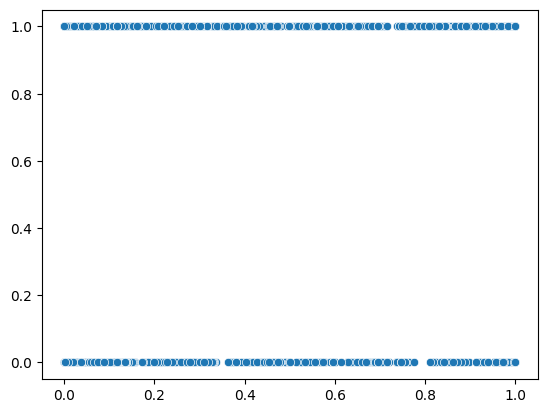

In [ ]:
sns.scatterplot(x= preds, y= labels_valid)

In [ ]:
cat_quantity = sum(labels_valid)

for i in range(1,10):
    print('threshold :'+str(.1*i))
    print(sum(labels_valid[preds > .1*i])/labels_valid[preds > .1*i].shape[0])

threshold :0.1
0.5898203592814372
threshold :0.2
0.6243478260869565
threshold :0.30000000000000004
0.6465863453815262
threshold :0.4
0.6551724137931034
threshold :0.5
0.679144385026738
threshold :0.6000000000000001
0.7049180327868853
threshold :0.7000000000000001
0.7269076305220884
threshold :0.8
0.7336683417085427
threshold :0.9
0.7266187050359713


In [ ]:
print(preds.mean())
print(preds[labels_valid == 0].mean())
print(preds[labels_valid == 1].mean())

0.3779583
0.2676771
0.48823947


# Bigger Convolutional Model

In [ ]:
# Define the size of the fully connected layers in the CNN
fc_layer_size = 256

# Define the input size of the images
img_size = IMG_SIZE

# Define the input layer with the shape of the resized images
conv_inputs = keras.Input(shape=(img_size[1], img_size[0], 3), name='ani_image')

# Add the first convolutional layer with 48 filters, a kernel size of 3x3, and ReLU activation
conv_layer = layers.Conv2D(48, kernel_size=3, activation='relu')(conv_inputs)

# Add the first max pooling layer with a pool size of 2x2
conv_layer = layers.MaxPool2D(pool_size=(2, 2))(conv_layer)

# Add the second convolutional layer with 48 filters, a kernel size of 3x3, and ReLU activation
conv_layer = layers.Conv2D(48, kernel_size=3, activation='relu')(conv_layer)

# Add the second max pooling layer with a pool size of 2x2
conv_layer = layers.MaxPool2D(pool_size=(2, 2))(conv_layer)

# Flatten the feature maps to convert them into a vector
conv_x = layers.Flatten(name='flattened_features')(conv_layer)

# Add a fully connected (dense) layer with ReLU activation
conv_x = layers.Dense(fc_layer_size, activation='relu', name='first_layer')(conv_x)

# Add another fully connected (dense) layer with ReLU activation
conv_x = layers.Dense(fc_layer_size, activation='relu', name='second_layer')(conv_x)

# Add the output layer with a single neuron and sigmoid activation for binary classification
conv_outputs = layers.Dense(1, activation='sigmoid', name='class')(conv_x)

# Create the convolutional model by specifying the inputs and outputs
conv_model = keras.Model(inputs=conv_inputs, outputs=conv_outputs)

In [ ]:
customAdam = keras.optimizers.Adam(lr=1e-6)
conv_model.compile(optimizer=customAdam,  # Optimizer
              # Loss function to minimize
              loss="binary_crossentropy",
              # List of metrics to monitor
              metrics=["binary_crossentropy","mean_squared_error"])

In [ ]:
print('# Fit model on training data')

history = conv_model.fit(x_train,
                    labels_train, #we pass it th labels
                    #If the model is taking forever to train, make this bigger
                    #If it is taking forever to load for the first epoch, make this smaller
                    batch_size=64,
                    shuffle = True,
                    epochs=15,
                    # We pass it validation data to
                    # monitor loss and metrics
                    # at the end of each epoch
                    validation_data=(x_valid, labels_valid))

# Fit model on training data
Epoch 1/15
64/64 [==============================] - 130s 2s/step - loss: 30.3697 - binary_crossentropy: 30.3697 - mean_squared_error: 0.3061 - val_loss: 0.6851 - val_binary_crossentropy: 0.6851 - val_mean_squared_error: 0.2444
Epoch 2/15
64/64 [==============================] - 122s 2s/step - loss: 0.6239 - binary_crossentropy: 0.6239 - mean_squared_error: 0.2190 - val_loss: 0.7318 - val_binary_crossentropy: 0.7318 - val_mean_squared_error: 0.2513
Epoch 3/15
64/64 [==============================] - 127s 2s/step - loss: 0.5050 - binary_crossentropy: 0.5050 - mean_squared_error: 0.1716 - val_loss: 0.8822 - val_binary_crossentropy: 0.8822 - val_mean_squared_error: 0.2712
Epoch 4/15
64/64 [==============================] - 122s 2s/step - loss: 0.3814 - binary_crossentropy: 0.3814 - mean_squared_error: 0.1252 - val_loss: 1.1839 - val_binary_crossentropy: 1.1839 - val_mean_squared_error: 0.2966
Epoch 5/15
64/64 [==============================] - 125s 2s/step - lo

In [ ]:
preds = conv_model.predict(x_valid)
preds = np.asarray([pred[0] for pred in preds])
np.corrcoef(preds, labels_valid)

32/32 [==============================] - 5s 154ms/step


array([[1.        , 0.11862673],
       [0.11862673, 1.        ]])

<Axes: >

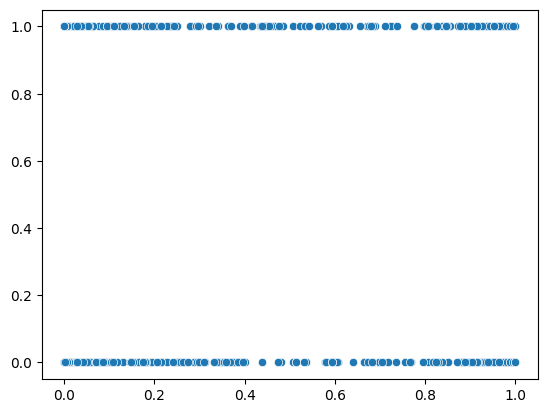

In [ ]:
sns.scatterplot(x= preds, y= labels_valid)

In [ ]:
print(preds.mean())
print(preds[labels_valid == 0].mean())
print(preds[labels_valid == 1].mean())

0.5282582
0.4751804
0.581336


In [ ]:
cat_quantity = sum(labels_valid)

for i in range(1,10):
    print('threshold :'+str(.1*i))
    print(sum(labels_valid[preds > .1*i])/labels_valid[preds > .1*i].shape[0])

threshold :0.1
0.5350609756097561
threshold :0.2
0.540453074433657
threshold :0.30000000000000004
0.5434412265758092
threshold :0.4
0.5583482944344704
threshold :0.5
0.5518518518518518
threshold :0.6000000000000001
0.5536062378167641
threshold :0.7000000000000001
0.5564681724845996
threshold :0.8
0.5605095541401274
threshold :0.9
0.5626423690205011


In [ ]:
# Function to convert a NumPy array to an image for visualization
def animal_pic(index):
    # Convert the NumPy array at the given index in the validation set to an image
    return Image.fromarray(x_valid[index])

# Function to predict whether the image at the given index is a cat
def cat_index(index):
    # Predict the class of the image at the given index in the validation set
    # Convert the prediction to a scalar value (0 or 1)
    return conv_model.predict(np.asarray([x_valid[index]]))[0][0]

In [ ]:
conv_model.save('conv_model_big')

1/1 [==============================] - 0s 121ms/step
probability of being a cat: 0.9999630451202393


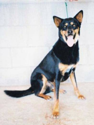

In [ ]:
index = 600
print("probability of being a cat: {}".format(cat_index(index)))
animal_pic(index)

In [ ]:
conv_model.predict(np.asarray([x_valid[124]]))[0][0]

1/1 [==============================] - 0s 32ms/step


0.99996305

In [ ]:
big_model = keras.models.load_model('conv_model_big')

# Huge Model

In [ ]:
# Define the size of the fully connected layers in the CNN
fc_layer_size = 256

# Define the input size of the images
img_size = IMG_SIZE

# Define the input layer with the shape of the resized images
conv_inputs = keras.Input(shape=(img_size[1], img_size[0], 3), name='ani_image')

# Add the first convolutional layer with 128 filters, a kernel size of 3x3, and ReLU activation
conv_layer = layers.Conv2D(128, kernel_size=3, activation='relu')(conv_inputs)

# Add the first max pooling layer with a pool size of 2x2
conv_layer = layers.MaxPool2D(pool_size=(2, 2))(conv_layer)

# Add the second convolutional layer with 128 filters, a kernel size of 3x3, and ReLU activation
conv_layer = layers.Conv2D(128, kernel_size=3, activation='relu')(conv_layer)

# Add the second max pooling layer with a pool size of 2x2
conv_layer = layers.MaxPool2D(pool_size=(2, 2))(conv_layer)

# Flatten the feature maps to convert them into a vector
conv_x = layers.Flatten(name='flattened_features')(conv_layer)

# Add a fully connected (dense) layer with ReLU activation
conv_x = layers.Dense(fc_layer_size, activation='relu', name='first_layer')(conv_x)

# Add another fully connected (dense) layer with ReLU activation
conv_x = layers.Dense(fc_layer_size, activation='relu', name='second_layer')(conv_x)

# Add the output layer with a single neuron and sigmoid activation for binary classification
conv_outputs = layers.Dense(1, activation='sigmoid', name='class')(conv_x)

# Create the more complex convolutional model by specifying the inputs and outputs
huge_conv_model = keras.Model(inputs=conv_inputs, outputs=conv_outputs)


In [ ]:
customAdam = keras.optimizers.Adam(lr=1e-6)
huge_conv_model.compile(optimizer=customAdam,  # Optimizer
              # Loss function to minimize
              loss="binary_crossentropy",
              # List of metrics to monitor
              metrics=["binary_crossentropy","mean_squared_error"])

In [79]:
print('# Fit model on training data')

history = huge_conv_model.fit(x_train,
                    labels_train, #we pass it th labels
                    #If the model is taking forever to train, make this bigger
                    #If it is taking forever to load for the first epoch, make this smaller
                    batch_size=64,
                    shuffle = True,
                    epochs=5,
                    # We pass it validation data to
                    # monitor loss and metrics
                    # at the end of each epoch
                    validation_data=(x_valid, labels_valid))

# Fit model on training data
Epoch 1/5
64/64 [==============================] - 470s 7s/step - loss: 30.4003 - binary_crossentropy: 30.4003 - mean_squared_error: 0.2725 - val_loss: 0.6924 - val_binary_crossentropy: 0.6924 - val_mean_squared_error: 0.2496
Epoch 2/5
64/64 [==============================] - 458s 7s/step - loss: 0.6850 - binary_crossentropy: 0.6850 - mean_squared_error: 0.2461 - val_loss: 0.6837 - val_binary_crossentropy: 0.6837 - val_mean_squared_error: 0.2451
Epoch 3/5
64/64 [==============================] - 469s 7s/step - loss: 0.6527 - binary_crossentropy: 0.6527 - mean_squared_error: 0.2271 - val_loss: 0.7274 - val_binary_crossentropy: 0.7274 - val_mean_squared_error: 0.2526
Epoch 4/5
64/64 [==============================] - 469s 7s/step - loss: 0.5736 - binary_crossentropy: 0.5736 - mean_squared_error: 0.1978 - val_loss: 0.8224 - val_binary_crossentropy: 0.8224 - val_mean_squared_error: 0.2661
Epoch 5/5
64/64 [==============================] - 468s 7s/step - loss: 0

In [80]:
preds = huge_conv_model.predict(x_valid)
preds = np.asarray([pred[0] for pred in preds])
np.corrcoef(preds, labels_valid)

32/32 [==============================] - 54s 2s/step


array([[1.        , 0.17688731],
       [0.17688731, 1.        ]])

In [81]:
print(preds.mean())
print(preds[labels_valid == 0].mean())
print(preds[labels_valid == 1].mean())

0.5456849
0.4953746
0.5959952


In [82]:
cat_quantity = sum(labels_valid)

for i in range(1,10):
    print('threshold :'+str(.1*i))
    print(sum(labels_valid[preds > .1*i])/labels_valid[preds > .1*i].shape[0])

threshold :0.1
0.5086021505376344
threshold :0.2
0.5178365937859609
threshold :0.30000000000000004
0.5356695869837297
threshold :0.4
0.5351724137931034
threshold :0.5
0.5450236966824644
threshold :0.6000000000000001
0.6055276381909548
threshold :0.7000000000000001
0.6338983050847458
threshold :0.8
0.6591928251121076
threshold :0.9
0.6333333333333333


In [83]:
huge_conv_model.save('conv_model_huge_e13')

In [84]:
big_model = keras.models.load_model('conv_model_huge_e13')

In [85]:
preds = big_model.predict(x_valid)
preds = np.asarray([pred[0] for pred in preds])

32/32 [==============================] - 28s 889ms/step


In [86]:
sum(labels_valid)

512

In [87]:
for i in range(1,10):
    t = .1*i
    print("{:.1f}:".format(t))
    tp = (preds > t)&(labels_valid==1)
    tn = (preds <= t)&(labels_valid==0)
    print(np.sum(np.where(tp|tn, 1, 0))/1024.)

0.1:
0.515625
0.2:
0.5302734375
0.3:
0.5556640625
0.4:
0.5498046875
0.5:
0.5556640625
0.6:
0.58203125
0.7:
0.5771484375
0.8:
0.5693359375
0.9:
0.5390625


In [88]:
print('# Fit model on training data')

history = big_model.fit(x_train,
                    labels_train, #we pass it th labels
                    #If the model is taking forever to train, make this bigger
                    #If it is taking forever to load for the first epoch, make this smaller
                    batch_size=32, #before 64
                    shuffle = True,
                    epochs=10,
                    # We pass it validation data to
                    # monitor loss and metrics
                    # at the end of each epoch
                    validation_data=(x_valid, labels_valid))

# Fit model on training data
Epoch 1/10
128/128 [==============================] - 505s 4s/step - loss: 0.6618 - binary_crossentropy: 0.6618 - mean_squared_error: 0.2258 - val_loss: 0.7246 - val_binary_crossentropy: 0.7246 - val_mean_squared_error: 0.2570
Epoch 2/10
128/128 [==============================] - 487s 4s/step - loss: 0.7793 - binary_crossentropy: 0.7793 - mean_squared_error: 0.2276 - val_loss: 0.7955 - val_binary_crossentropy: 0.7955 - val_mean_squared_error: 0.2615
Epoch 3/10
128/128 [==============================] - 494s 4s/step - loss: 0.8210 - binary_crossentropy: 0.8210 - mean_squared_error: 0.2347 - val_loss: 0.7230 - val_binary_crossentropy: 0.7230 - val_mean_squared_error: 0.2554
Epoch 4/10
128/128 [==============================] - 485s 4s/step - loss: 0.6451 - binary_crossentropy: 0.6451 - mean_squared_error: 0.2280 - val_loss: 0.7523 - val_binary_crossentropy: 0.7523 - val_mean_squared_error: 0.2586
Epoch 5/10
128/128 [==============================] - 497s 4s/s

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-88-a4044d17f169>", line 3, in <cell line: 3>
    history = big_model.fit(x_train,
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1807, in fit
    tmp_logs = self.train_function(iterator)
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/traceback_utils.py", line 150, in error_handler
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/polymorphic_function/polymorphic_function.py", line 832, in __call__
    result = self._call(*args, **kwds)
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/polymorphic_fu

TypeError: object of type 'NoneType' has no len()

In [89]:
preds = big_model.predict(x_valid)
preds = np.asarray([pred[0] for pred in preds])
for i in range(1,10):
    t = .1*i
    print("{:.1f}:".format(t))
    tp = (preds > t)&(labels_valid==1)
    tn = (preds <= t)&(labels_valid==0)
    print(np.sum(np.where(tp|tn, 1, 0))/1024.)

32/32 [==============================] - 31s 941ms/step
0.1:
0.5009765625
0.2:
0.5
0.3:
0.505859375
0.4:
0.509765625
0.5:
0.5625
0.6:
0.5478515625
0.7:
0.5341796875
0.8:
0.52734375
0.9:
0.521484375


In [ ]:
big_model.save('conv_model_big_e19')